In [50]:
from pathlib import Path
import pandas as pd
from subprocess import run
import seaborn as sns
import numpy as np

# Read expression

In [12]:
p = pths["pth"][0]

In [11]:
pths = pd.DataFrame({"pth": list(Path("../data/gdc_download_20190716_072512.085705/").rglob("*.txt.gz"))})

In [15]:
pths["fname"] = pths["pth"].apply(lambda x: x.name)

In [18]:
pths["parent"] = pths["pth"].apply(lambda x: x.parent.name)

In [29]:
def word_count(pth):
    return run(["wc", str(pth)], capture_output=True).stdout.decode("utf-8").split()[0:2]

In [34]:
def ratio(x):
    return int(x[0]) / int(x[1])

In [32]:
wc = pths["pth"].apply(word_count)

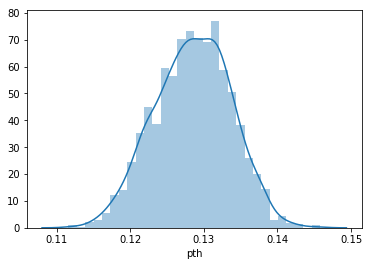

In [37]:
sns.distplot(wc.apply(ratio))

In [76]:
s = pd.read_csv(p, header=None, sep="\t", index_col=0)

In [67]:
def read_files():
    expr = pd.DataFrame(index=s.index)  # Where s is global
    for p in pths.itertuples():
        expr[p.parent] = pd.read_csv(p.pth, sep="\t", header=None, squeeze=True, index_col=0)
    return expr

In [68]:
%%time
expr = read_files()

CPU times: user 2min, sys: 13.3 s, total: 2min 13s
Wall time: 2min 16s


In [71]:
np.mean((expr == 0).values)

0.45791482781967446

In [72]:
import scanpy as sc

In [ ]:
sc.AnnData(expr.T, obs)

# Metadata

In [114]:
%load_ext blackcellmagic

In [78]:
import json
from glom import glom

In [81]:
cases = json.loads(Path("../metadata/cases.2019-07-16.json").read_text())

In [128]:
cases[0]

{'diagnoses': [{'primary_diagnosis': 'Acute myeloid leukemia, NOS'}],
 'disease_type': 'Myeloid Leukemias',
 'demographic': {'gender': 'male', 'vital_status': 'Alive'},
 'submitter_id': 'TCGA-AB-2874',
 'project': {'program': {'name': 'TCGA'}, 'project_id': 'TCGA-LAML'},
 'case_id': '67cf58e9-203e-455a-a25d-5e38d08028bc',
 'primary_site': 'Hematopoietic and reticuloendothelial systems',
 'summary': {'data_categories': [{'file_count': 5,
    'data_category': 'Transcriptome Profiling'},
   {'file_count': 5, 'data_category': 'Copy Number Variation'},
   {'file_count': 16, 'data_category': 'Simple Nucleotide Variation'},
   {'file_count': 2, 'data_category': 'DNA Methylation'},
   {'file_count': 2, 'data_category': 'Clinical'},
   {'file_count': 4, 'data_category': 'Sequencing Reads'},
   {'file_count': 6, 'data_category': 'Biospecimen'}],
  'file_count': 40}}

In [102]:
Counter([c["primary_site"] for c in cases])

Counter({'Hematopoietic and reticuloendothelial systems': 1161,
         'Lymph nodes': 29,
         'Blood': 156,
         'Lymph Nodes': 522})

In [129]:
metadata = pd.DataFrame(
    glom(
        cases,
        {
            "case_id": ["case_id"],
            "primary_site": ["primary_site"],
            "disease_type": ["disease_type"],
            "submitter_id": ["submitter_id"]
        },
    )
)

In [130]:
metadata.head()

,case_id,primary_site,disease_type,submitter_id
0,67cf58e9-203e-455a-a25d-5e38d08028bc,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias,TCGA-AB-2874
1,c7afc0d0-ca32-4be1-9477-ad106290c460,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias,TCGA-AB-2939
2,21bd7197-2504-4710-8c13-a9da9f71b0d5,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias,TCGA-AB-2933
3,3c25d91d-0e1b-46db-a842-06275c5db258,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias,TCGA-AB-2890
4,a45a91f6-55a5-4a5e-ba54-0ac0b4e87d8c,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias,TCGA-AB-2882


In [140]:
metadata["submitter_id"].unique().shape

(1868,)

In [141]:
pths.set_index

,pth,fname,parent
0,../data/gdc_download_20190716_072512.085705/33...,0334cd86-c0c2-4357-91ec-f77c40f742ea.FPKM.txt.gz,33d23e23-42a3-43df-836d-4ff1b7aed458
1,../data/gdc_download_20190716_072512.085705/7b...,19132b52-43e6-418f-88c9-3a661de090ec.FPKM.txt.gz,7b59ed2e-7084-4dcf-823a-b733122a4e51
2,../data/gdc_download_20190716_072512.085705/9a...,206f4066-35dc-4546-8372-70240ed9520d.FPKM.txt.gz,9a069553-ebc9-4e03-8528-ae7651657bdf
3,../data/gdc_download_20190716_072512.085705/07...,c117ba64-ac66-4ddc-95ad-8228a11f9e9c.FPKM.txt.gz,07638aea-32a7-47dd-a73a-8ba6b5257b77
4,../data/gdc_download_20190716_072512.085705/db...,9765c550-2c54-4672-84eb-ff93d07d7122.FPKM.txt.gz,dbe55f09-0c38-4190-b041-583ce9a508f3
5,../data/gdc_download_20190716_072512.085705/24...,3b142ee8-0822-4d40-9a08-a7ee6d6616da.FPKM.txt.gz,24d9580f-b2b2-446f-9b2f-fe45e200afff
6,../data/gdc_download_20190716_072512.085705/ab...,9693cca3-7368-45ec-a684-130c415c9441.FPKM.txt.gz,ab8e100a-b3bd-4a00-94d7-282686ba1b8a
7,../data/gdc_download_20190716_072512.085705/18...,bdd494b6-f73d-4018-99e3-dca932cda316.FPKM.txt.gz,18ff4ce4-763e-4bef-b454-dc46b0bd858a
8,../data/gdc_download_20190716_072512.085705/83...,03d684b3-bf71-49f1-af3c-6a6c6e534cf8.FPKM.txt.gz,83bd8a82-8ece-4fde-a310-68de542b2936
9,../data/gdc_download_20190716_072512.085705/24...,a916f8cd-e3a0-4bab-a97b-8c97df014be9.FPKM.txt.gz,24dbdb51-8439-4890-97eb-e79288263b98


In [117]:
# metadata.set_index("case_id", inplace=True)

In [144]:
metadata.head()

,case_id,primary_site,disease_type,submitter_id
0,67cf58e9-203e-455a-a25d-5e38d08028bc,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias,TCGA-AB-2874
1,c7afc0d0-ca32-4be1-9477-ad106290c460,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias,TCGA-AB-2939
2,21bd7197-2504-4710-8c13-a9da9f71b0d5,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias,TCGA-AB-2933
3,3c25d91d-0e1b-46db-a842-06275c5db258,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias,TCGA-AB-2890
4,a45a91f6-55a5-4a5e-ba54-0ac0b4e87d8c,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias,TCGA-AB-2882


In [119]:
metadata.index.isin(expr.columns)

False

In [131]:
sample_sheet = pd.read_csv("../metadata/gdc_sample_sheet.2019-07-16.tsv", sep="\t")

In [132]:
sample_sheet.head()

,File ID,File Name,Data Category,Data Type,Project ID,Case ID,Sample ID,Sample Type
0,60f08d3f-8929-4c56-8321-080cd534aa0c,1315ac11-5c20-4558-9bbb-44c40ac025d1.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-LAML,TCGA-AB-2880,TCGA-AB-2880-03A,Primary Blood Derived Cancer - Peripheral Blood
1,d30b0070-755b-4bc3-b569-11f139843d25,70b3fc1e-7664-4c81-bce5-9eafdc968912.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-LAML,TCGA-AB-2901,TCGA-AB-2901-03A,Primary Blood Derived Cancer - Peripheral Blood
2,9c635ada-19af-4a76-9f23-ff92c15d5907,abc58c64-5da9-4ed7-9172-e6550906e724.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-LAML,TCGA-AB-2948,TCGA-AB-2948-03A,Primary Blood Derived Cancer - Peripheral Blood
3,a5734246-3d44-46b9-a2fe-80b91118edcc,f1671132-0f54-4bce-b2ae-060cb131b96b.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-LAML,TCGA-AB-2976,TCGA-AB-2976-03A,Primary Blood Derived Cancer - Peripheral Blood
4,c93a3ae6-6d66-49ae-9ec5-025a7549e1aa,ae0e2087-9667-4429-a2b5-5f2359bee3fd.FPKM.txt.gz,Transcriptome Profiling,Gene Expression Quantification,TCGA-LAML,TCGA-AB-2811,TCGA-AB-2811-03B,Primary Blood Derived Cancer - Peripheral Blood


In [138]:
sample_sheet["File ID"].isin(pths["parent"])

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12      True
13      True
14      True
15      True
16      True
17      True
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
        ... 
1985    True
1986    True
1987    True
1988    True
1989    True
1990    True
1991    True
1992    True
1993    True
1994    True
1995    True
1996    True
1997    True
1998    True
1999    True
2000    True
2001    True
2002    True
2003    True
2004    True
2005    True
2006    True
2007    True
2008    True
2009    True
2010    True
2011    True
2012    True
2013    True
2014    True
Name: File ID, Length: 2015, dtype: bool

In [135]:
assert sample_sheet["File Name"].isin(pths["fname"]).all()

In [136]:
sample_sheet["Case ID"].isin(metadata["submitter_id"])

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15      False
16       True
17       True
18      False
19       True
20       True
21      False
22       True
23       True
24       True
25       True
26       True
27      False
28       True
29      False
        ...  
1985     True
1986     True
1987     True
1988     True
1989     True
1990     True
1991     True
1992     True
1993     True
1994     True
1995     True
1996     True
1997     True
1998     True
1999     True
2000     True
2001     True
2002     True
2003     True
2004     True
2005     True
2006     True
2007     True
2008     True
2009     True
2010     True
2011     True
2012     True
2013     True
2014     True
Name: Case ID, Length: 2015, dtype: bool

In [143]:
metadata.set_index("submitter_id", inplace=True, drop=False)

,case_id,primary_site,disease_type
submitter_id,,,
TCGA-AB-2874,67cf58e9-203e-455a-a25d-5e38d08028bc,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias
TCGA-AB-2939,c7afc0d0-ca32-4be1-9477-ad106290c460,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias
TCGA-AB-2933,21bd7197-2504-4710-8c13-a9da9f71b0d5,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias
TCGA-AB-2890,3c25d91d-0e1b-46db-a842-06275c5db258,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias
TCGA-AB-2882,a45a91f6-55a5-4a5e-ba54-0ac0b4e87d8c,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias
TCGA-AB-2900,9dbd2ef7-77da-42ef-90d2-8d30b4330f94,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias
TCGA-AB-2819,96686a1a-16d0-4cdc-b1f7-5dbbf4cf1c9f,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias
TCGA-AB-2863,3f67b6bc-8886-459a-be73-d702f977a8ba,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias
TCGA-AB-2859,b147ea90-5643-4680-ac90-d6e8f7166792,Hematopoietic and reticuloendothelial systems,Myeloid Leukemias


In [169]:
targets = pd.merge(metadata, sample_sheet, left_on="submitter_id", right_on="Case ID")
targets = pd.merge(targets, pths, left_on="File Name", right_on="fname")

In [170]:
targets = targets.loc[:, targets.apply(lambda x: len(x.unique()) != 1)].copy()

In [171]:
targets.drop(columns=["pth"], inplace=True)

In [172]:
assert targets["parent"].isin(expr.columns).all()

In [173]:
targets["parent"].unique().shape

(1996,)

In [174]:
targets.shape

(1996, 12)

In [175]:
targets.set_index("parent", inplace=True)

# Bundling into AnnData

In [176]:
expr = expr[targets.index]

In [178]:
adata = sc.AnnData(expr.T, obs=targets)

In [179]:
adata

AnnData object with n_obs × n_vars = 1996 × 60483 
    obs: 'case_id', 'primary_site', 'disease_type', 'submitter_id', 'File ID', 'File Name', 'Project ID', 'Case ID', 'Sample ID', 'Sample Type', 'fname'

In [184]:
adata.obs["primary_site"].value_counts()

Hematopoietic and reticuloendothelial systems    1258
Lymph Nodes                                       522
Blood                                             187
Lymph nodes                                        29
Name: primary_site, dtype: int64

In [187]:
adata.obs.loc[adata.obs["primary_site"] == "Lymph Nodes", "primary_site"] = "Lymph nodes"

In [195]:
adata.obs["primary_site"] = pd.Categorical(adata.obs["primary_site"].astype(str))

In [196]:
adata.write_h5ad("../data/tcga.h5ad", compression="gzip")